In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def boxplot_with_dots(df, columns, value = None, title = None):
    fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

    # Boxplot
    data = [df[col].dropna() for col in columns]
    ax.boxplot(data, widths=0.6)

    # Add dots (jittered)
    for i, col in enumerate(columns, start=1):
        y = df[col].dropna()
        x = np.random.normal(i, 0.04, size=len(y))  # jitter
        ax.scatter(x, y, alpha=0.6)

    ax.set_xticks(range(1, len(columns) + 1))
    ax.set_xticklabels(columns, rotation=45)
    ax.set_ylabel(value)
    if title is not None:
        ax.set_title(title)

    plt.tight_layout()
    plt.show()


In [55]:
path = "/mnt/c/Users/Elena/Desktop/Data_processing/test/res/results.csv"

In [3]:
df = pd.read_csv(path, encoding="latin1")

In [26]:
df2 = pd.read_csv(path, encoding="latin1")

In [56]:
df3 = pd.read_csv(path, encoding="latin1")

In [67]:
df4 = pd.read_csv(path, encoding="latin1")

In [68]:
df4.head()

,File_name,Nucleus_area,Nucleus_MFI,Foci_number,All_foci_IFI_photons,All_foci_MFI_px,All_foci_sigma_nm,Outliers_number,Outliers_MFI_px,Outliers_sigma_nm
0,C2_MP_U2OS_fixed_20nMJF549_ORC1_WT.nd2_(series...,302.964,8.484,1009,1485.645470,0.059334,153.901144,28,0.160039,142.920693
1,C2_MP_U2OS_fixed_20nMJF549_ORC1_WT.nd2_(series...,298.486,4.601,921,818.738108,0.046394,126.120652,28,0.157159,139.349839
2,C2_MP_U2OS_fixed_20nMJF549_ORC1_WT.nd2_(series...,354.843,5.894,1144,1665.256066,0.081527,142.900667,32,0.205292,144.447027
3,C2_MP_U2OS_fixed_20nMJF549_ORC1_WT.nd2_(series...,445.861,9.085,1366,637.239273,0.030469,129.193425,42,0.112144,178.880206
4,C2_MP_U2OS_fixed_20nMJF549_ORC1_WT.nd2_(series...,563.132,6.667,1873,1043.120895,0.050363,138.440865,59,0.142959,161.497679


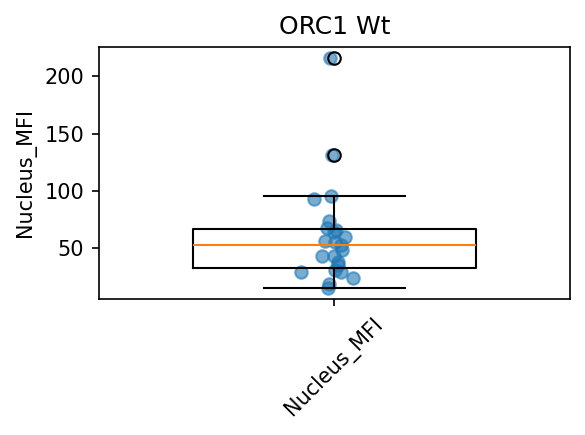

In [37]:
boxplot_with_dots(df, ["Nucleus_MFI"], value = "Nucleus_MFI", title = "ORC1 Wt")

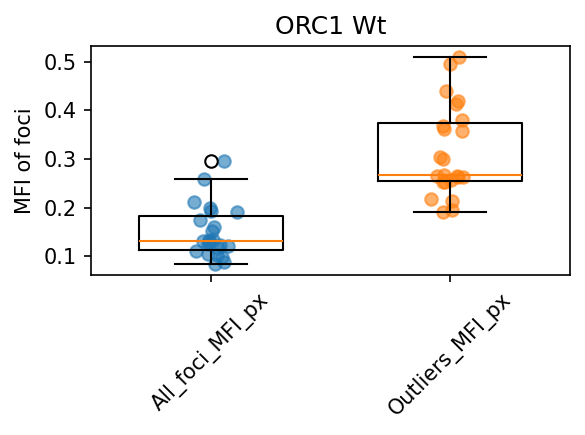

In [20]:
boxplot_with_dots(df, ["All_foci_MFI_px", "Outliers_MFI_px"], value = "MFI of foci", title = "ORC1 Wt")

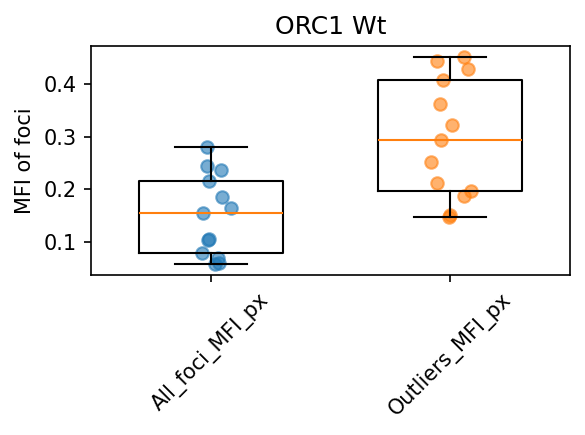

In [28]:
boxplot_with_dots(df2, ["All_foci_MFI_px", "Outliers_MFI_px"], value = "MFI of foci", title = "ORC1 Wt")

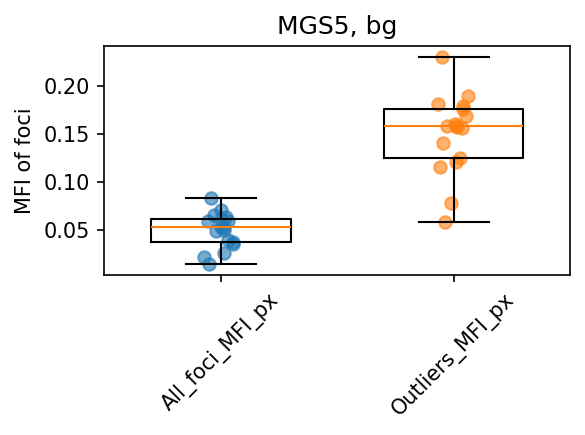

In [58]:
boxplot_with_dots(df3, ["All_foci_MFI_px", "Outliers_MFI_px"], value = "MFI of foci", title = "MGS5, bg")

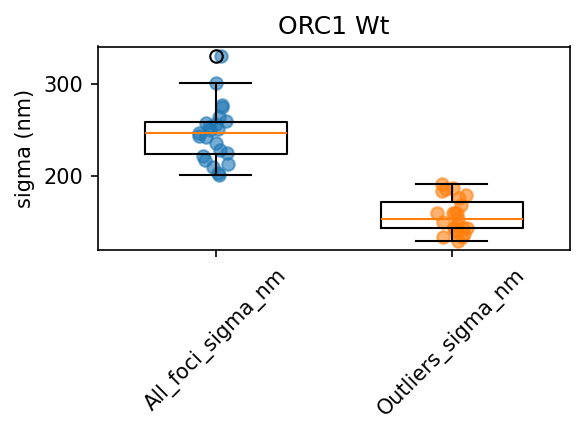

In [21]:
boxplot_with_dots(df, ["All_foci_sigma_nm", "Outliers_sigma_nm"], value = "sigma (nm)", title = "ORC1 Wt")

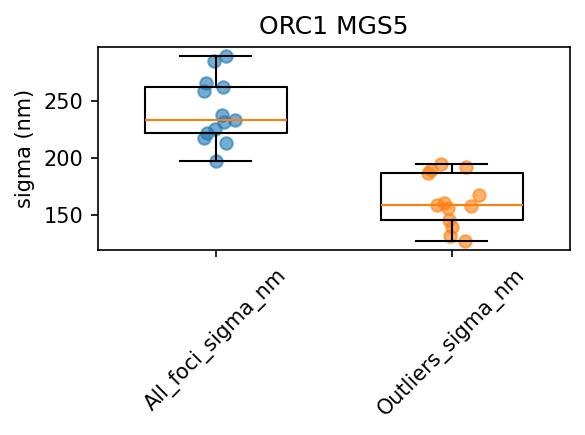

In [38]:
boxplot_with_dots(df2, ["All_foci_sigma_nm", "Outliers_sigma_nm"], value = "sigma (nm)", title = "ORC1 MGS5")

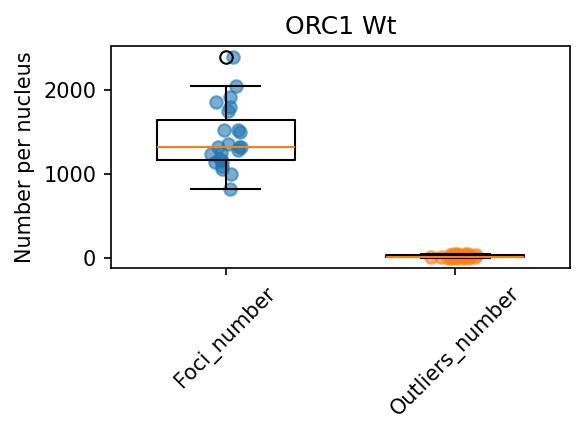

In [22]:
boxplot_with_dots(df, ["Foci_number", "Outliers_number"], value = "Number per nucleus", title = "ORC1 Wt")

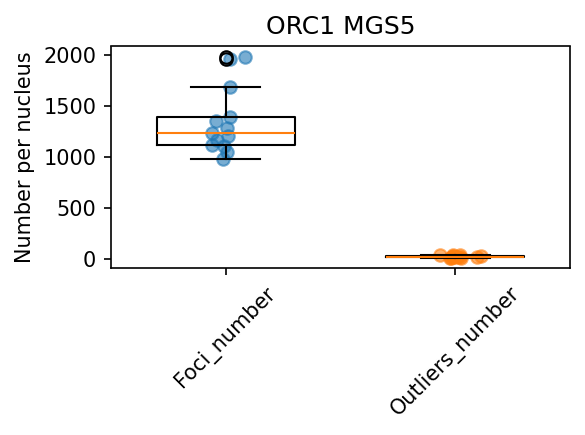

In [60]:
boxplot_with_dots(df2, ["Foci_number", "Outliers_number"], value = "Number per nucleus", title = "ORC1 MGS5")

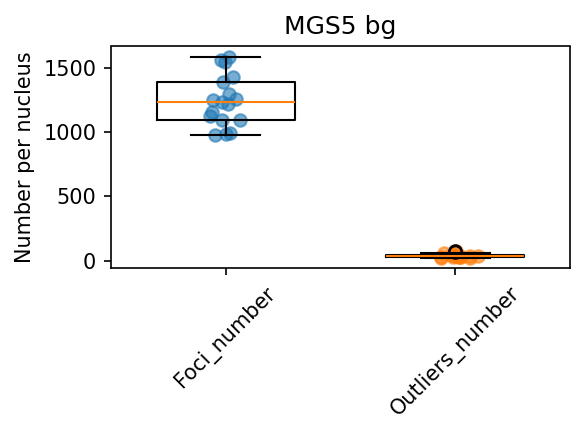

In [59]:
boxplot_with_dots(df3, ["Foci_number", "Outliers_number"], value = "Number per nucleus", title = "MGS5 bg")

In [35]:
from scipy.stats import mannwhitneyu

value = "All_foci_MFI_px"
stat, p = mannwhitneyu(
    df[value].dropna(),
    df2[value].dropna(),
    alternative="two-sided"   # or "greater" / "less"
)

print("U statistic:", stat)
print("p-value:", p)

U statistic: 157.0
p-value: 0.8176697440767567


In [44]:
df.columns

Index(['File_name', 'Nucleus_area', 'Nucleus_MFI', 'Foci_number',
       'All_foci_IFI_photons', 'All_foci_MFI_px', 'All_foci_sigma_nm',
       'Outliers_number', 'Outliers_MFI_px', 'Outliers_sigma_nm'],
      dtype='str')

In [77]:
from scipy.stats import ttest_ind

value = "Outliers_sigma_nm"
stat, p = ttest_ind(
    df3[value].dropna(),
    df4[value].dropna(),
    equal_var=False  # recommended (Welch’s t-test)
)

print("t statistic:", stat)
print("p-value:", p)

t statistic: -1.709105178618734
p-value: 0.09847940081801604


In [78]:
def boxplot_two_columns(df1, col1, df2, col2,
                        label1="Group 1",
                        label2="Group 2",
                        ylabel=None,
                        title=None):

    fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

    # Extract data
    data1 = df1[col1].dropna()
    data2 = df2[col2].dropna()

    # Boxplot
    ax.boxplot([data1, data2], widths=0.6)

    # Jittered dots
    x1 = np.random.normal(1, 0.04, size=len(data1))
    x2 = np.random.normal(2, 0.04, size=len(data2))

    ax.scatter(x1, data1, alpha=0.6)
    ax.scatter(x2, data2, alpha=0.6)

    # Labels
    ax.set_xticks([1, 2])
    ax.set_xticklabels([label1, label2])

    if ylabel:
        ax.set_ylabel(ylabel)

    if title:
        ax.set_title(title)

    # Clean style
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(direction="out")

    plt.tight_layout()
    plt.show()


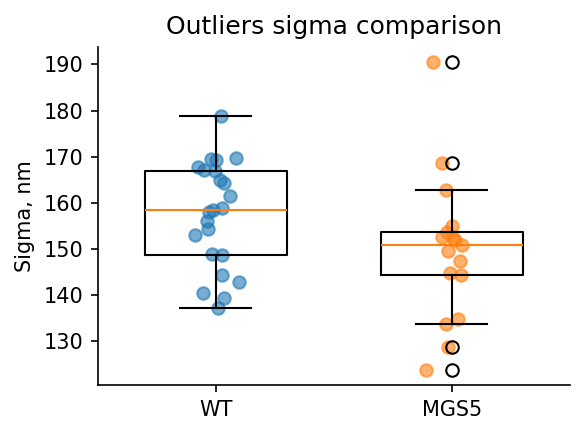

In [82]:
boxplot_two_columns(
    df4, "Outliers_sigma_nm",
    df3, "Outliers_sigma_nm",
    label1="WT",
    label2="MGS5",
    ylabel="Sigma, nm",
    title="Outliers sigma comparison"
)

In [ ]:
boxplot_two_columns(
    df4, "All_foci_sigma_nm",
    df3, "All_foci_sigma_nm",
    label1="WT",
    label2="MGS5",
    ylabel="Sigma, nm",
    title="Foci sigma comparison"
)